### Probabilistic Biostatistics Examples
Code snippets to reproduce examples in the paper and presentation

In [7]:
# Turing.jl BHM for binomial trials
using Turing, MCMCChains
@model binomial_trials(s,n) = begin
    g = length(n)  # number of groups
    # hierarchical priors
    ω ~ Beta(2,3)
    K ~ Gamma(10,1/0.05)
    a = ω*K + 1.0
    b = (1.0 - ω)*K + 1.0
    # priors for each occurrence rate
    θ = Array{Real}(undef, g)
    for k in 1:g
        θ[k] ~ Beta(a,b)
    end
    # likelihood
    for i in 1:g
        s[i] ~ Binomial(n[i],θ[i])
    end
end

binomial_trials (generic function with 3 methods)

In [5]:
# data used in example for Figures 3-5
# Placebo:
sn_pcbo = [3 11; 4 37; 8 65; 10 76; 2 150]
# Treatment:
sn_treat = [6 11; 7 37; 17 63; 23 133; 11 159]

sp = sn_pcbo[:,1];
np = sn_pcbo[:,2];
st = sn_treat[:,1];
nt = sn_treat[:,2];

5-element Array{Int64,1}:
  11
  37
  63
 133
 159

In [16]:
Turing.turnprogress(false)
ctrt = mapreduce(c->sample(binomial_trials(st, nt),
    NUTS(3000,1000,0.65)),chainscat,  1:3);
    # for HMC sampler replace NUTS() with: 
    # HMC(3000, 0.05, 10)

ωₜ = Array(ctrt["ω"]);  # treatment ω

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing C:\Users\millsjf\.julia\packages\Turing\eIa7P\src\Turing.jl:24
┌ Info: Found initial step size
│   init_ϵ = 0.4
└ @ Turing.Inference C:\Users\millsjf\.julia\packages\Turing\eIa7P\src\inference\hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.5899141257853889), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.59)
│   h.metric = DiagEuclideanMetric([0.0306511, 0.11494, 0.0657 ...])
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\hAEIX\src\sampler.jl:67
┌ Info: Finished 3000 sampling steps in 2.94872427 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.0306511, 0.11494, 0.0657 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.59), max_depth=5), Δ_max=1000.0)
│   EBFMI(Hs) = 529.7423788054616
│   mean(αs) = 0.7363665582386987
└ @ AdvancedHMC C:\

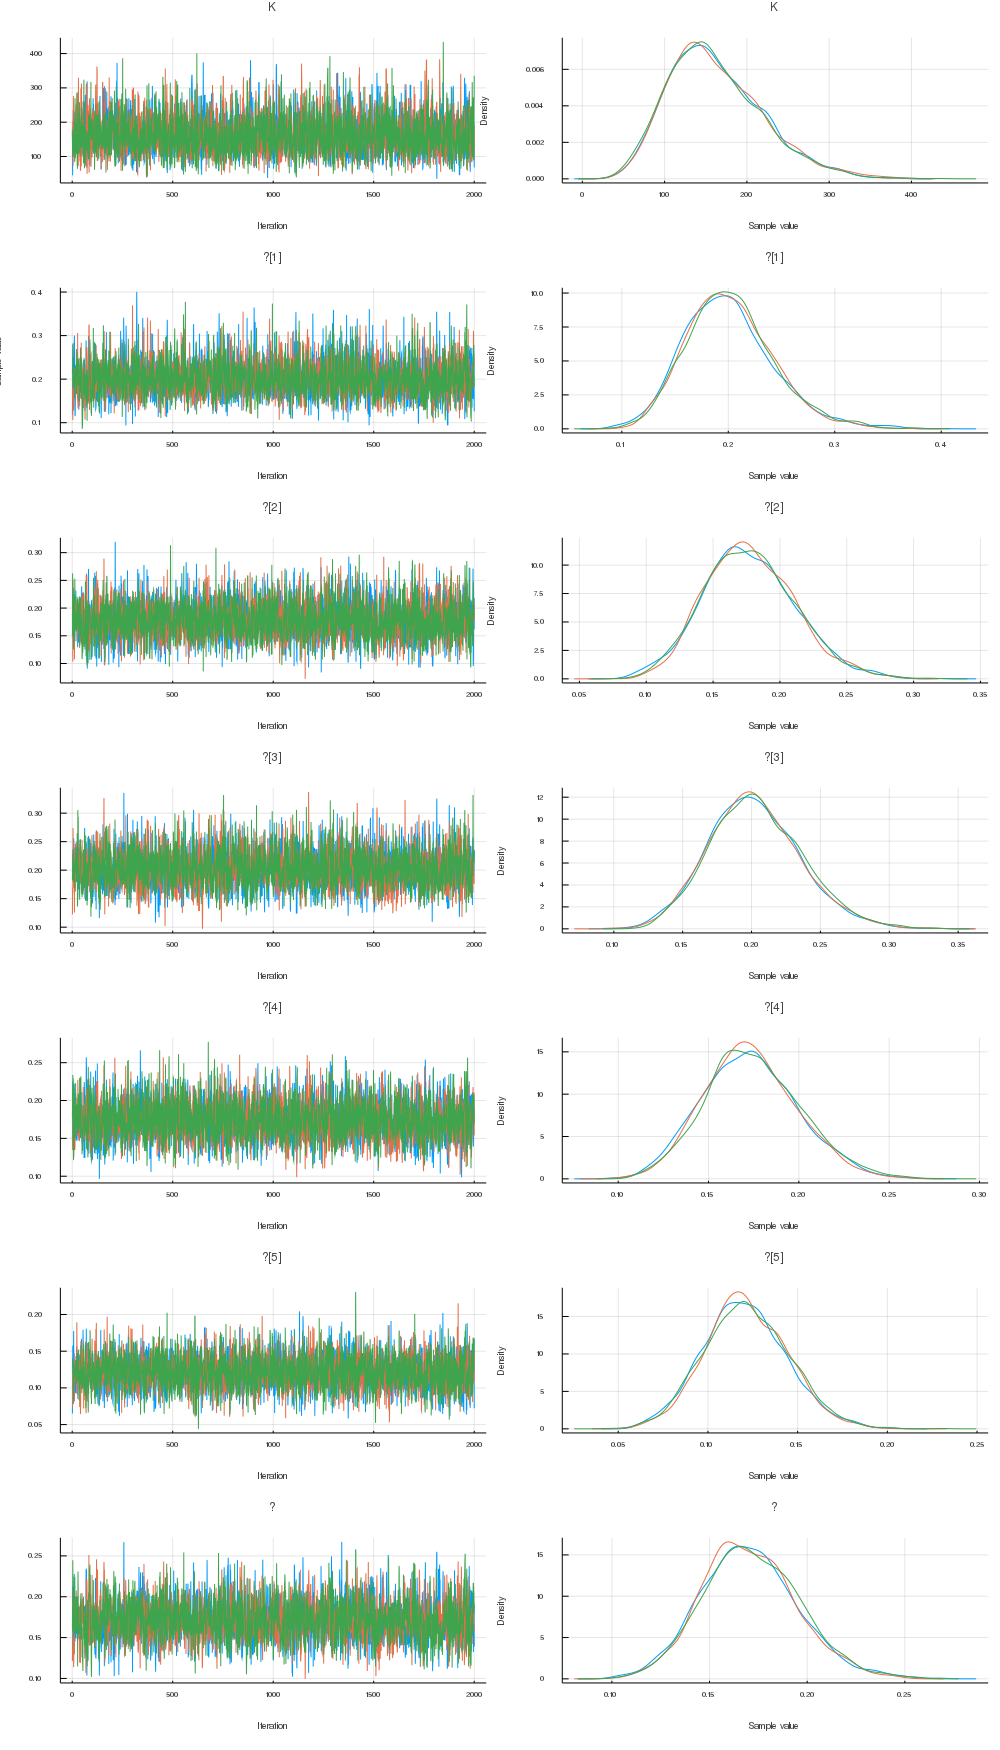

In [17]:
plot(ctrt)

In [18]:
describe(ctrt)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean     │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64  │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│ 1   │ K          │ 162.214  │ 57.1818   │ 0.738214    │ 0.855775    │
│ 2   │ θ[1]       │ 0.201361 │ 0.041326  │ 0.000533516 │ 0.000754552 │
│ 3   │ θ[2]       │ 0.177611 │ 0.0340054 │ 0.000439008 │ 0.000528419 │
│ 4   │ θ[3]       │ 0.202743 │ 0.0333221 │ 0.000430187 │ 0.000553374 │
│ 5   │ θ[4]       │ 0.173691 │ 0.0261071 │ 0.000337041 │ 0.000397961 │
│ 6   │ θ[5]       │ 0.12123  │ 0.0232464 │ 0.000300109 │ 0.000303682 │
│ 7   │ ω          │ 0.170825 │ 0.0245196 │ 0.000316547 │ 0.000473423 │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64   │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼────────

In [20]:
# placebo
cpbo = mapreduce(c->sample(binomial_trials(sp, np),
    NUTS(3000,1000,0.65)), chainscat,  1:3);

ωₚ = Array(cpbo["ω"]);  # placebo ω

┌ Info: Found initial step size
│   init_ϵ = 0.4
└ @ Turing.Inference C:\Users\millsjf\.julia\packages\Turing\eIa7P\src\inference\hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.5192513181808606), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.519)
│   h.metric = DiagEuclideanMetric([0.0537585, 0.119553, 0.095 ...])
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\hAEIX\src\sampler.jl:67
┌ Info: Finished 3000 sampling steps in 4.760408636 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.0537585, 0.119553, 0.095 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.519), max_depth=5), Δ_max=1000.0)
│   EBFMI(Hs) = 439.1868551781684
│   mean(αs) = 0.7822650210722213
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\hAEIX\src\sampler.jl:77
┌ Info: Found initial step size
│   init_ϵ = 0.8
└ @ Tu

In [23]:
δ = ωₜ - ωₚ;           # difference

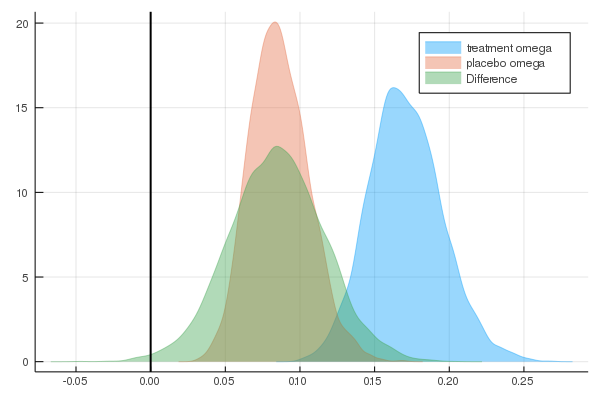

In [26]:
using Plots
plot(ωₜ,st=:density,label="treatment omega", fill=true, alpha=0.4)
plot!(ωₚ,st=:density,label="placebo omega", fill=true, alpha=0.4)
plot!(δ, st=:density, label="Difference", fill=true, alpha=0.4)
vline!([0.0], label="", linewidth=2, linecolor = :black)

In [27]:
using BayesTesting
# compute mean, SD, 0.95 prob. interval,
# PDR odds and tail prob.
@show([mean(δ) std(δ)]);
@show(quantile(δ,[0.025,0.5,0.975]));
@show([mcodds(δ, h0=0.0) bayespval(δ)]);

[mean(δ) std(δ)] = [0.0845994 0.0316483]
quantile(δ, [0.025, 0.5, 0.975]) = [0.0225011, 0.084337, 0.147211]
[mcodds(δ, h0=0.0) bayespval(δ)] = Any[30.4731 (0.00483333, 0.00966667)]
